# 1. Perkenalan

Nama : Gusti Ayu Dewi Puspa Kartikasari

Batch : FTDS-012

Dataset : heart.csv

Objective : klasifikasi kemungkinan orang terkena serangan jantung.

# 2. Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
#Kolom import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,StandardScaler


# 3. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dl

In [2]:
#Data Loading from census_adult_income.csv
df = pd.read_csv(r'heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#show tail data
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
# copy df untuk menjaga data asli
df_copy = df.copy()

In [5]:
# melihat persebaran data df, dan mengetahui masing-masing kolom di dalam df
df_copy.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# melihat null vs non-null data df, untuk mengetahui missing value 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Tidak ada null data. Lanjutkan ke EDA untuk melihat isi data

# 4. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, heatmap, central tendency dan lain sebagainya.

Target : target

In [7]:
#melihat unique value padatarget (default_payment_next_month)
df_copy.target.unique()

array([1, 0], dtype=int64)

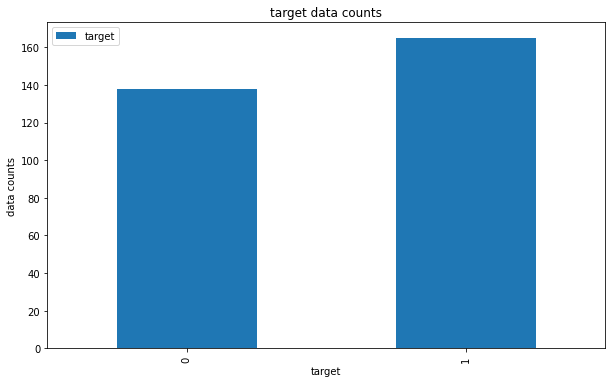

In [8]:
#groupby default_payment_next_month
df_copy.groupby(["target"])[["target"]].count().plot(kind='bar', figsize=(10, 6))
plt.xlabel('target') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('target data counts') # add title to the plot

plt.show()

Terjadi data imbalance pada taget 0, sehingga ada kemungkinan model kurang mempelajari kategori 0, namun data imbalance masih sangat kecil. Sehingga bisa dianggap tidak akan memiliki pengaruh yang signifikan terhadap prediksi.

In [9]:
#membuat def perhitungan proportion, sebelum memasukkannya ke grafik
def make_dataplot_proportion(df3,grdf):
    col3 = []
    for i in df3.loc[:,0]:

        try:
            k = pd.Series.item(grdf.loc[i,0])
        except KeyError:
            k = 0
        
        try:
            b = pd.Series.item(grdf.loc[i,1])
        except KeyError:
            b=0

        try:
            col3.append(b/(b+k))
        except ZeroDivisionError:
            col3.append(0)
        
    df3['proportion'] = col3
    pd.DataFrame(df3)

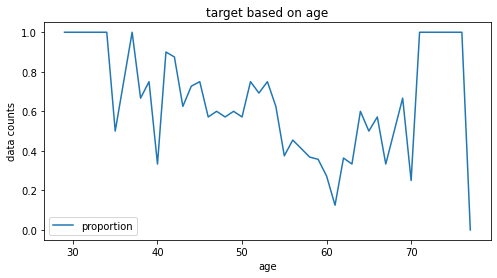

In [10]:
#hitung proportion berdasarkan age
dataunique= pd.DataFrame(df_copy['age'].unique())
gruopeddf = df_copy.groupby(['age','target'])[["target"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : 'age'}, inplace=True)
dataunique = dataunique.sort_values(by='age', ascending=True)
dataunique.set_index('age', inplace=True)

dataunique.plot(kind='line', figsize=(8, 4))
plt.xlabel('age') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('target based on age') # add title to the plot
plt.show()

proporsi pasien dengan kemungkinan terkena serangan jantung menurun di umur 40-70. Age mempengaruhi target.

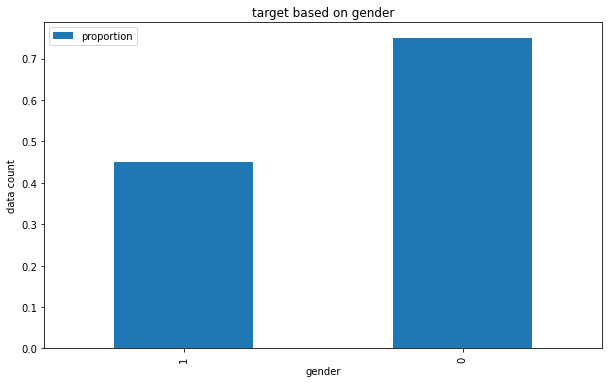

In [11]:
#hitung proportion berdasarkan sex(gender)
dataunique= pd.DataFrame(df_copy['sex'].unique())
gruopeddf = df_copy.groupby(['sex','target'])[["target"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : 'gender'}, inplace=True)
dataunique.set_index('gender', inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel('gender') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title('target based on gender') # add title to the plot

plt.show()

sex (1 = male; 0 = female), dimana proporsi gender male lebih sedikit mengalami kemungkinan terkena serangan jantung. Gender mempengaruhi target.

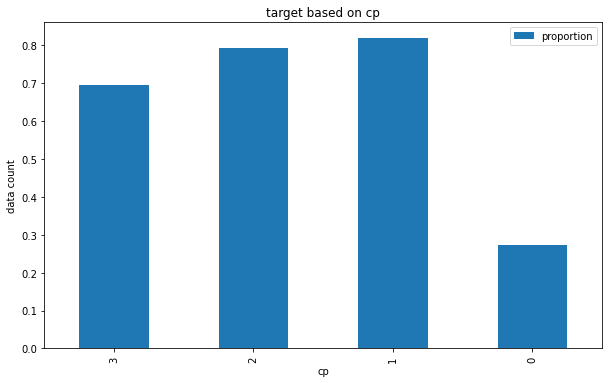

In [12]:
#hitung proportion berdasarkan cp
dataunique= pd.DataFrame(df_copy['cp'].unique())
gruopeddf = df_copy.groupby(['cp','target'])[["target"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : 'cp'}, inplace=True)
dataunique.set_index('cp', inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel('cp') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title('target based on cp') # add title to the plot

plt.show()

cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic (value 0 here)
dimana proporsi chest pain asymptomatic (value 0 disini) lebih sedikit mengalami kemungkinan terkena serangan jantung. cp mempengaruhi target.

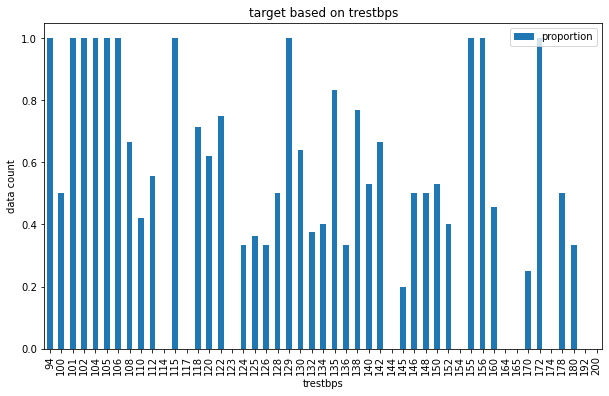

In [13]:
#hitung proportion berdasarkan trestbps
i = 'trestbps'
dataunique= pd.DataFrame(df_copy[i].unique())
gruopeddf = df_copy.groupby([i,'target'])[["target"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title('target based on '+ i) # add title to the plot

plt.show()

trestbpd: resting blood pressure, dimana proporsi blood pressure mengalami penurunan 124 dan 152, trestbpd: resting blood pressure mempengaruhi target

0 = no/less chance of heart attack and 1 = more chance of heart attack

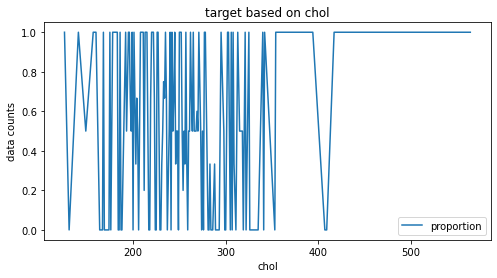

In [14]:
#hitung proportion berdasarkan chol
i = 'chol'
dataunique= pd.DataFrame(df_copy[i].unique())
gruopeddf = df_copy.groupby([i,'target'])[["target"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='line', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('target based on ' + i) # add title to the plot

plt.show()

untuk chol, tidak bisa diabmil kesimpulan, perlu melihat score feature importance

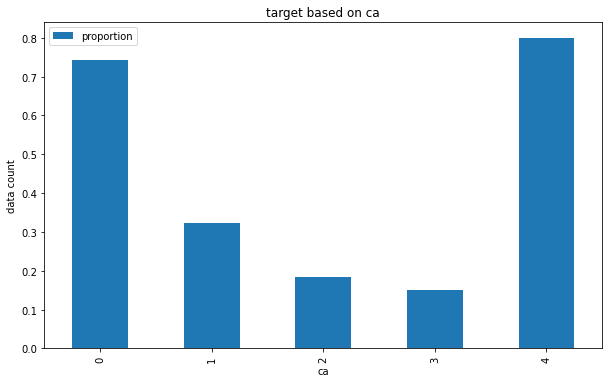

In [15]:
#hitung proportion berdasarkan ca
i = 'ca'
dataunique= pd.DataFrame(df_copy[i].unique())
gruopeddf = df_copy.groupby([i,'target'])[["target"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title('target based on '+ i) # add title to the plot

plt.show()

pada keterangan dataset, hanya terdapat deskripsi nilai 0-3 maka nilai 4 tidak diketahui (pada kenyataannya ada). Dikarenakan tidak adanya sumber yang bisa mengkoreksi data maka data akan digunakan as it is terlebih dahulu. Proporsi pasien dengan kemungkinan terkena serangan jantung menurun pada kategori 1 sampai 3, ca mempengaruhi target.

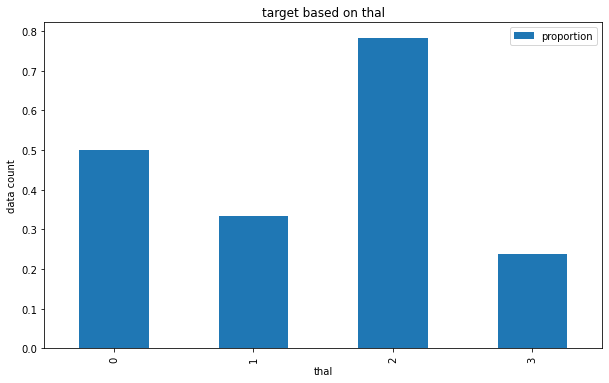

In [16]:
#hitung proportion berdasarkan thal
i = 'thal'
dataunique= pd.DataFrame(df_copy[i].unique())
gruopeddf = df_copy.groupby([i,'target'])[["target"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title('target based on '+ i) # add title to the plot

plt.show()

pada keterangan dataset (thal: 3 = normal; 6 = fixed defect; 7 = reversable defect), hanya terdapat deskripsi tersebut dan pada data set menggunakan nilai 0-3 yang tidak diketahui (pada kenyataannya ada). Dikarenakan tidak adanya sumber yang bisa mengkoreksi data maka data akan digunakan as it is terlebih dahulu. Proporsi pasien dengan kemungkinan terkena serangan jantung menurun pada kategori 0,1 dan 3. Sehingga diambil kesimpulan thal mempengaruhi target.

Note: untuk kolom lain, penentuan terpilih atau tidaknya sebagai feature akan dilanjutkan dengan heat map dan feature importance.

# 5. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get Data for Model Inference

In [17]:
df_copy.shape

(303, 14)

data hanya memiliki 303 data, sehingga proporsi inference yang diambil hanya 10

In [18]:
#Get data inference sebanyak 30 row sample dan lock randomize.
df_inf = df_copy.sample(10, random_state = 15)
df_inf.shape

(10, 14)

In [19]:
# Hapus data yang dipakai oleh data inference dari df
df_trts = df_copy.drop(df_inf.index)

# Cek ukuran dataset untuk train dan test, telah berkurang 30 row dari 2965:
df_trts.shape

(293, 14)

In [20]:
# Reset index dari kedua dataframe inference dan data untuk train & test
df_inf.reset_index(drop = True, inplace=True)
df_trts.reset_index(drop = True, inplace=True)

## Splitting Dataset, y-X and train-test

In [21]:
#Splitting dataset X adalah feature dan y adalah target
X = df_trts.drop('target', axis = 1)
y = df_trts['target']

In [22]:
#Splitting dataset menjadi 80% untuk train dan 20% untuk test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [23]:
#Cek ukuran dataset train dan test untuk memastikan proporsi
print('Train set size: ', X_train.shape)
print('Test set size: ', X_test.shape)

Train set size:  (234, 13)
Test set size:  (59, 13)


## Feature Selection

Feature Selection dilakukan sebelum data preprocessing untuk mempersempit cakupan preprocessing data sehingga dapat mengurangi waktu pengolahan data dan menghindari mengolah data yang pada akhirnya tidak terpakai.

In [24]:
#Display X_train to see the features
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
71,51,1,0,140,261,0,0,186,1,0.0,2,0,2
282,58,0,0,170,225,1,0,146,1,2.8,1,2,1
255,66,1,0,112,212,0,0,132,1,0.1,2,1,2
109,55,1,1,130,262,0,1,155,0,0.0,2,0,2
106,57,1,2,150,126,1,1,173,0,0.2,2,1,3


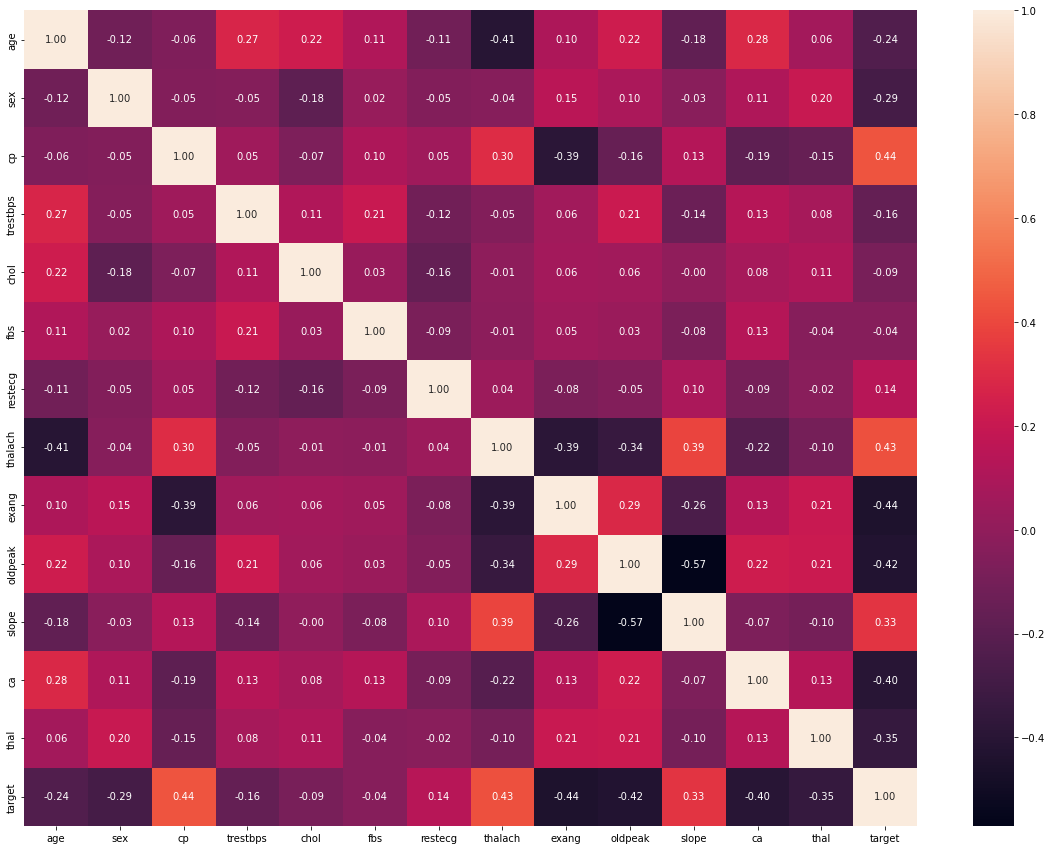

In [25]:
# Use heatmap for identifying correlation between numeric features
plt.figure(figsize=(20,15))
sns.heatmap(df_trts.corr(), annot=True, fmt='.2f')
plt.show()

Dari heatmap ini dapat terlihat semua kolom mempunyai korelasi dengan 'target' dengan fbs,chol dan restecg nilai terendah.
Lanjut ke random forest classifier (feature importance) untuk mencari data pendukung tambahan

In [26]:
#create classifier with n estimator = 100
featimpt = RandomForestClassifier(n_estimators= 100, random_state=15)

#fit to the data
featimpt.fit(X_train,y_train)

#simpan hasil dan buat menjadi dataframe
scorepercolumn = pd.Series(featimpt.feature_importances_, index = X_train.columns)
scorepercolumn.sort_values(ascending=False)

cp          0.148295
thalach     0.128689
thal        0.127675
ca          0.106026
oldpeak     0.096624
age         0.088515
exang       0.076069
chol        0.071697
trestbps    0.051948
slope       0.047937
sex         0.029988
restecg     0.016031
fbs         0.010506
dtype: float64

chol memiliki score tinggi, maka akan dimasukkan kedalam feature selection. Melihat restecg dan fbs memiliki score yang rendah maka kolom ini akan di exclude dalam feature selection.

In [27]:
#Keep only featurs that selected

X_train_fs = X_train.loc[:,['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']]
X_test_fs = X_test.loc[:,['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']]
X_test_fs.head(3)

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal
97,59,1,3,178,270,145,0,4.2,0,0,3
124,74,0,1,120,269,121,1,0.2,2,1,2
115,64,0,0,130,303,122,0,2.0,1,2,2


## Missing value handling

In [28]:
# Looking missing value in X_train
X_train_fs.isnull().sum().sum()

0

In [29]:
# Looking missing value in X_test
X_test_fs.isnull().sum().sum()

0

In [30]:
# Looking missing value in y_train
y_train.isnull().sum().sum()

0

In [31]:
# Looking missing value in y_test
y_test.isnull().sum().sum()

0

Cek unique value setiap kolom

In [32]:
for i in X_train.columns:
    print(i,":")
    print(X_train[i].unique())

age :
[51 58 66 55 57 54 63 60 59 53 64 42 45 43 40 48 49 47 67 62 41 65 44 76
 70 52 46 56 50 35 71 61 77 34 39 38 68 29 37 69]
sex :
[1 0]
cp :
[0 1 2 3]
trestbps :
[140 170 112 130 150 110 128 134 138 120 115 122 118 135 152 142 154 146
 124 180 125 172 145 114 108 160 200 132 100 105 178 136 164 106 129 174
 102  94 192 104 126 117 148 165 101]
chol :
[261 225 212 262 126 214 303 195 253 204 234 227 209 260 167 222 160 149
 295 304 229 277 274 315 226 232 294 278 326 250 219 275 197 322 286 394
 327 230 231 249 407 256 192 199 284 243 266 244 265 240 205 168 239 335
 166 174 293 223 187 246 267 264 308 309 318 220 177 330 258 242 157 188
 269 282 302 288 342 268 182 313 213 254 172 245 216 198 236 131 180 233
 247 271 263 210 201 175 353 183 228 319 176 186 276 196 289 203 211 255
 283 206 235 299 193 270 305 417 354 184 311 340 248 300 169 221 298 208
 409 281 178 273 215 252 325 290 341 360 218 307]
fbs :
[0 1]
restecg :
[0 1 2]
thalach :
[186 146 132 155 173 158 159 179 144 162 

terdapat data mencurigakan, yakni ca dan thal yang tidak sesuai data deskripsi. Sesuai dengan EDA, data akan digunakan as it is. Tidak terdapat missing value pada kedua dataset. Proceed ke outlier handling.

## Split between Numerical Columns and Categorical Columns

Data Splitting antara kolom kategori dan numerical dilakukan sebelum outlier untuk memudahkan outlier handling, baik dari sisi grafik dan pengihitungan outlier.

In [33]:
X_train_fs

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal
71,51,1,0,140,261,186,1,0.0,2,0,2
282,58,0,0,170,225,146,1,2.8,1,2,1
255,66,1,0,112,212,132,1,0.1,2,1,2
109,55,1,1,130,262,155,0,0.0,2,0,2
106,57,1,2,150,126,173,0,0.2,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...
199,59,1,0,140,177,162,1,0.0,2,1,3
155,38,1,2,138,175,173,0,0.0,2,4,2
156,38,1,2,138,175,173,0,0.0,2,4,2
133,51,0,2,120,295,157,0,0.6,2,0,2


In [34]:
#Memilih feature numerical dan categorical

num_col = ['age','trestbps','chol', 'thalach', 'oldpeak']
cat_col = ['sex', 'cp','exang', 'slope', 'ca', 'thal']

In [35]:
# Split data set sesuai dengan categorical dan numerical
X_train_num = X_train_fs[num_col]
X_train_cat = X_train_fs[cat_col]

X_test_num = X_test_fs[num_col]
X_test_cat = X_test_fs[cat_col]

In [36]:
#show Xtrain num
X_train_num.head(3)

,age,trestbps,chol,thalach,oldpeak
71,51,140,261,186,0.0
282,58,170,225,146,2.8
255,66,112,212,132,0.1


In [37]:
#show Xtrain cat
X_train_cat.head(3)

,sex,cp,exang,slope,ca,thal
71,1,0,1,2,0,2
282,0,0,1,1,2,1
255,1,0,1,2,1,2


## Outliers handling

In [38]:
# Membuat def fungsi untuk membuat histogram dan boxplot bagi numerical X_train 
def hist_boxplot(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print('skewness:', df[variable].skew())
    if (df[variable].skew() <= -0.5 ) | (df[variable].skew() >= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

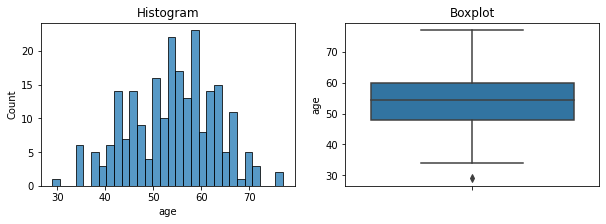

skewness: -0.18848276307563616
the distribution is normal


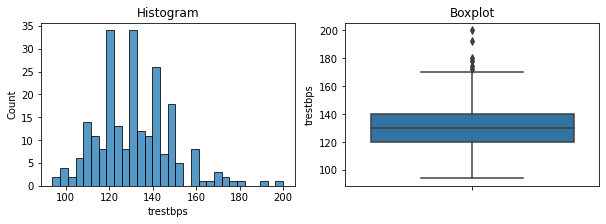

skewness: 0.698193611806609
the distribution is skewed


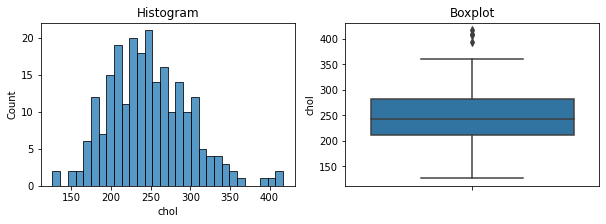

skewness: 0.49548098151460346
the distribution is normal


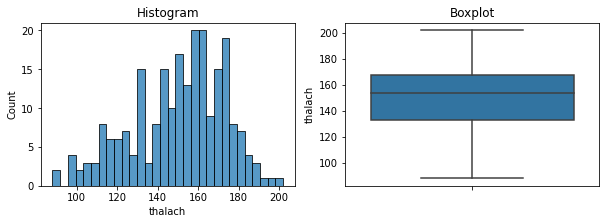

skewness: -0.4927186006011542
the distribution is normal


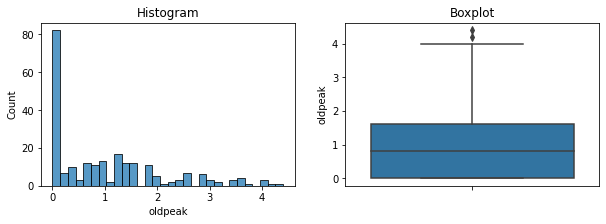

skewness: 1.0493555158304804
the distribution is skewed


In [39]:
#munculkan histogram dan boxplot bagi ketiga feature di X_Traim_num
for i in num_col:
    hist_boxplot(X_train_num, i)


data yang memiliki distribusi normal yakni age,chol dan thalach. Yang memiliki distribusi skew trestbps dan oldpeak. Terlihat oldpeak,chol, trestbps dan age memiliki outlier namun dianggap sebagai natural outlier karena age bisa saja pesertanya memang memiliki usia yang tingggi dan untuk sisanya wajar jika terjadi outlier.

## Cardinality



Lakukan cardinality apabila diperlukan pada category dataset

In [40]:
X_train_cat.head(5)

,sex,cp,exang,slope,ca,thal
71,1,0,1,2,0,2
282,0,0,1,1,2,1
255,1,0,1,2,1,2
109,1,1,0,2,0,2
106,1,2,0,2,1,3


Jumlah kategori dari semua feature rendah, maka tidak perlu melakukan cardinality untuk menurunkan jumlah kategori.

## Feature Scaling

Scaling akan dilakukan dengan menggunakan pipeline bersama encoding, menggunakan minmaxscaler dan standardscaler dikarenakan sebagian feature yang terdapat dalam numerik memiliki distribusi skewed dan sebagian normal.

## Feature Encoding

Encoding akan dilakukan dengan menggunakan pipeline bersama scaling, menggunakan onehotencoder dikarenakan semua kategori tidak dalam bentuk ordinal.

## Concate between Numerical Columns and Categorical Columns

In [41]:
#Satukan kedua dataset train dan test dari num dan category
X_train_fin = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_fin = pd.concat([X_test_num, X_test_cat ], axis=1)
X_train_fin

,age,trestbps,chol,thalach,oldpeak,sex,cp,exang,slope,ca,thal
71,51,140,261,186,0.0,1,0,1,2,0,2
282,58,170,225,146,2.8,0,0,1,1,2,1
255,66,112,212,132,0.1,1,0,1,2,1,2
109,55,130,262,155,0.0,1,1,0,2,0,2
106,57,150,126,173,0.2,1,2,0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...
199,59,140,177,162,0.0,1,0,1,2,1,3
155,38,138,175,173,0.0,1,2,0,2,4,2
156,38,138,175,173,0.0,1,2,0,2,4,2
133,51,120,295,157,0.6,0,2,0,2,0,2


Semua data berhasil di concat (num dan cat)

# 6. Model definition

Notes :

Algoritma yang akan dipakai adalah:

a. Decision Tree

b. Random Forest

note: Bandingkan antara model Decision Tree dan Random Forest. Analisa dua buah model ini dan tentukan model yang terbaik untuk data ini !

Dengan metrics yang akan dipakai untuk mengevaluasi adalah accuracy_score,classification_report untuk mengetahui recall, precision, dan nilai akurasi.

In [42]:
#state num dan cat cols, serta bagi cat cols menjadi ordinal dan nominal
num_skewcol = ['trestbps','oldpeak']
num_normcol = ['age','chol', 'thalach']
cat_col = ['sex', 'cp','exang', 'slope', 'ca', 'thal']

In [43]:
#persiapkan column transformer untuk membedakan proses per kolom
preprocess = ColumnTransformer([
    ('numskew', MinMaxScaler(),num_skewcol),
    ('catnom', StandardScaler(),num_normcol),
    ('catord', OneHotEncoder(handle_unknown='ignore'),cat_col)
])

In [44]:
#persiapkan pipeline Decission Tree
prepmod_DT = Pipeline([
    ('preprop', preprocess),
    ('DecTree', DecisionTreeClassifier())
    ])

In [45]:
#persiapkan pipeline Random Forest
prepmod_RF = Pipeline([
    ('preprop', preprocess),
    ('RFC',RandomForestClassifier())
    ])


# 7. Model Training

Model training akan dilakukan sekalian dengan grid search.

# 8. Model Evaluation

In [46]:
#buat dataframe untuk menampung hasil evaluasi
resulteval = pd.DataFrame(('DT','RF'))
resulteval.rename(columns ={0:'model'},inplace=True)
resulteval['mean']=[0,0]
resulteval['stddev']=[0,0]
resulteval['lower']=[0,0]
resulteval['upper']=[0,0]
resulteval

,model,mean,stddev,lower,upper
0,DT,0,0,0,0
1,RF,0,0,0,0


In [47]:
#Lakukan eval untuk DT
a = np.mean(cross_val_score(prepmod_DT,X_train_fin,y_train,cv=10))
b = np.std(cross_val_score(prepmod_DT,X_train_fin,y_train,cv=10))
resulteval.loc[0,'mean']=a
resulteval.loc[0,'stddev']=b
resulteval.loc[0,'lower']=a-b
resulteval.loc[0,'upper']=a+b

In [48]:
#Lakukan eval untuk RF
a = np.mean(cross_val_score(prepmod_RF,X_train_fin,y_train,cv=10))
b = np.std(cross_val_score(prepmod_RF,X_train_fin,y_train,cv=10))
resulteval.loc[1,'mean']=a
resulteval.loc[1,'stddev']=b
resulteval.loc[1,'lower']=a-b
resulteval.loc[1,'upper']=a+b

In [49]:
resulteval

,model,mean,stddev,lower,upper
0,DT,0.747826,0.117372,0.630454,0.865198
1,RF,0.871739,0.062324,0.809415,0.934063


dilihat dari mean dan std dev setiap model, maka diambil keputusan bahwa model base terbaik adalah Random Forest dikarenakan mean yang tinggi serta std dev yang rendah menunjukkan performa yang baik serta menandakan bahwa model memiliki sifat robust yang baik.

### Grid Search Decision Tree

In [50]:
#buat parameter grid bagi decisiontree
param_gridDT = [{'DecTree__max_depth': [2,3],
               'DecTree__random_state': [15, 30]}]

hyper parameter yang diambil adalah max depth dan random state untuk mengatur kedalaman ranting pohon sehingga mencegah overfit, serta mengatur ke randoman dari estimator

In [51]:
#buat grid search lalu fit
gridDT = GridSearchCV(prepmod_DT, param_gridDT, cv=5)
gridDT.fit(X_train_fin,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprop',
                                        ColumnTransformer(transformers=[('numskew',
                                                                         MinMaxScaler(),
                                                                         ['trestbps',
                                                                          'oldpeak']),
                                                                        ('catnom',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'chol',
                                                                          'thalach']),
                                                                        ('catord',
                                                                         OneH

In [52]:
#Cari best estimator bagi grid search tadi
print("Best estimator:\n{}".format(gridDT.best_estimator_))

Best estimator:
Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['trestbps', 'oldpeak']),
                                                 ('catnom', StandardScaler(),
                                                  ['age', 'chol', 'thalach']),
                                                 ('catord',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'exang',
                                                   'slope', 'ca', 'thal'])])),
                ('DecTree',
                 DecisionTreeClassifier(max_depth=3, random_state=15))])


In [53]:
#print best parameters
print("Best parameters: {}".format(gridDT.best_params_))

Best parameters: {'DecTree__max_depth': 3, 'DecTree__random_state': 15}


In [54]:
#print grid score
print("Test-set score: {:.2f}".format(gridDT.score(X_train_fin,y_train)))

Test-set score: 0.88


In [55]:
#lakukan predict menggunakan best parameter
y_train_predDT_best = gridDT.best_estimator_.predict(X_train_fin)
y_test_predDT_best = gridDT.best_estimator_.predict(X_test_fin)

In [56]:
#lakukan fit untuk base parameter
prepmod_DT.fit(X_train_fin,y_train)

Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['trestbps', 'oldpeak']),
                                                 ('catnom', StandardScaler(),
                                                  ['age', 'chol', 'thalach']),
                                                 ('catord',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'exang',
                                                   'slope', 'ca', 'thal'])])),
                ('DecTree', DecisionTreeClassifier())])

In [57]:
#lakukan predict untuk base parameter
y_train_predDT_base = prepmod_DT.predict(X_train_fin)
y_test_predDT_base = prepmod_DT.predict(X_test_fin)

Bandingkan hasil accuracy score antara best parameter dengan base parameter

In [58]:
#print accuracy score best param DT
print('accuracy score train : ',accuracy_score(y_train,y_train_predDT_best))
print('accuracy score test : ',accuracy_score(y_test,y_test_predDT_best))

accuracy score train :  0.8803418803418803
accuracy score test :  0.711864406779661


In [59]:
#print accuracy score base param
print('accuracy score train : ',accuracy_score(y_train,y_train_predDT_base))
print('accuracy score test : ',accuracy_score(y_test,y_test_predDT_base))

accuracy score train :  1.0
accuracy score test :  0.711864406779661


Dari accuracy score terlihat bahwa best parameter memiliki akurasi yang lebih baik dibanding base parameter, namun kedua model memiliki berbedaab yang besar antara nilai train dengan test, nilai test lebih kecil sehingga kedua model dinilai overfit.

Lanjut dengan membandingkan hasil classification report antara best parameter dengan base parameter decision tree

In [60]:
#print classification report best param
print('-----------train-------------')
print(classification_report(y_train,y_train_predDT_best))
print('-----------test-------------')
print(classification_report(y_test,y_test_predDT_best))

-----------train-------------
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       107
           1       0.85      0.95      0.90       127

    accuracy                           0.88       234
   macro avg       0.89      0.87      0.88       234
weighted avg       0.89      0.88      0.88       234

-----------test-------------
              precision    recall  f1-score   support

           0       0.75      0.62      0.68        29
           1       0.69      0.80      0.74        30

    accuracy                           0.71        59
   macro avg       0.72      0.71      0.71        59
weighted avg       0.72      0.71      0.71        59



In [61]:
#print classification report base param
print('-----------train-------------')
print(classification_report(y_train,y_train_predDT_base))
print('-----------test-------------')
print(classification_report(y_test,y_test_predDT_base))

-----------train-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       127

    accuracy                           1.00       234
   macro avg       1.00      1.00      1.00       234
weighted avg       1.00      1.00      1.00       234

-----------test-------------
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        29
           1       0.76      0.63      0.69        30

    accuracy                           0.71        59
   macro avg       0.72      0.71      0.71        59
weighted avg       0.72      0.71      0.71        59



yang dilihat adalah baris 1, dengan nilai 1 = 1. dan yang dilihat adalah recall untuk melihat dari data aktual positif berapa yang berhasil terdeteksi dengan benar. Memperbesar akurasi diagnosa pasien penyakit jantung.
Dari classification report terlihat bahwa best parameter memiliki nilai recall  yang lebih baik dengan perbedaan atara train dan test lebih baik dibanding base parameter. Artinya best parameter memiliki performa yang lebih baik dan lebih robust dibanding base parameter.

### Grid Search Random Forest

In [62]:
#buat parameter grid bagi Random Forest
param_gridRF = [{'RFC__max_depth': [2,3],
               'RFC__random_state': [15, 30]}]


hyper parameter yang diambil adalah max depth dan random state untuk mengatur kedalaman ranting pohon sehingga mencegah overfit, serta mengatur ke randoman dari estimator

In [63]:

#buat grid search lalu fit
gridRF = GridSearchCV(prepmod_RF, param_gridRF, cv=5)
gridRF.fit(X_train_fin,y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprop',
                                        ColumnTransformer(transformers=[('numskew',
                                                                         MinMaxScaler(),
                                                                         ['trestbps',
                                                                          'oldpeak']),
                                                                        ('catnom',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'chol',
                                                                          'thalach']),
                                                                        ('catord',
                                                                         OneH

In [64]:
#Cari best estimator bagi grid search tadi
print("Best estimator:\n{}".format(gridRF.best_estimator_))


Best estimator:
Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['trestbps', 'oldpeak']),
                                                 ('catnom', StandardScaler(),
                                                  ['age', 'chol', 'thalach']),
                                                 ('catord',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'exang',
                                                   'slope', 'ca', 'thal'])])),
                ('RFC', RandomForestClassifier(max_depth=3, random_state=30))])


In [65]:
#print best parameters
print("Best parameters: {}".format(gridRF.best_params_))


Best parameters: {'RFC__max_depth': 3, 'RFC__random_state': 30}


In [66]:
#print grid score
print("Test-set score: {:.2f}".format(gridRF.score(X_train_fin,y_train)))


Test-set score: 0.93


In [67]:
#lakukan predict menggunakan best parameter
y_train_predRF_best = gridRF.best_estimator_.predict(X_train_fin)
y_test_predRF_best = gridRF.best_estimator_.predict(X_test_fin)


In [68]:
#lakukan fit untuk base parameter
prepmod_RF.fit(X_train_fin,y_train)

#lakukan predict untuk base parameter
y_train_predRF_base = prepmod_RF.predict(X_train_fin)
y_test_predRF_base = prepmod_RF.predict(X_test_fin)



In [69]:
#print accuracy score best param RF
print('accuracy score train : ',accuracy_score(y_train,y_train_predRF_best))
print('accuracy score test : ',accuracy_score(y_test,y_test_predRF_best))

accuracy score train :  0.9273504273504274
accuracy score test :  0.711864406779661


In [70]:
#print accuracy score base param
print('accuracy score train : ',accuracy_score(y_train,y_train_predRF_base))
print('accuracy score test : ',accuracy_score(y_test,y_test_predRF_base))


accuracy score train :  1.0
accuracy score test :  0.6949152542372882


Dari accuracy score terlihat bahwa best parameter memiliki akurasi yang lebih baik dibanding base parameter, namun kedua model memiliki berbedaan yang besar antara nilai train dengan test, nilai test lebih kecil sehingga kedua model dinilai overfit.
Lanjut dengan membandingkan hasil classification report antara best parameter dengan base parameter random forest

In [71]:
#print classification report best param
print('-----------train-------------')
print(classification_report(y_train,y_train_predRF_best))
print('-----------test-------------')
print(classification_report(y_test,y_test_predRF_best))

-----------train-------------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       107
           1       0.90      0.97      0.94       127

    accuracy                           0.93       234
   macro avg       0.93      0.92      0.93       234
weighted avg       0.93      0.93      0.93       234

-----------test-------------
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        29
           1       0.72      0.70      0.71        30

    accuracy                           0.71        59
   macro avg       0.71      0.71      0.71        59
weighted avg       0.71      0.71      0.71        59



In [72]:

#print classification report base param
print('-----------train-------------')
print(classification_report(y_train,y_train_predRF_base))
print('-----------test-------------')
print(classification_report(y_test,y_test_predRF_base))


-----------train-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       127

    accuracy                           1.00       234
   macro avg       1.00      1.00      1.00       234
weighted avg       1.00      1.00      1.00       234

-----------test-------------
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        29
           1       0.71      0.67      0.69        30

    accuracy                           0.69        59
   macro avg       0.70      0.70      0.69        59
weighted avg       0.70      0.69      0.69        59



yang dilihat adalah baris 1, dengan nilai 1 = 1. dan yang dilihat adalah recall untuk melihat dari data aktual positif berapa yang berhasil terdeteksi dengan benar. Memperbesar akurasi diagnosa pasien penyakit jantung.
Dari classification report terlihat bahwa best parameter memiliki nilai recall  yang lebih baik dengan perbedaan atara train dan test lebih baik dibanding base parameter. Artinya best parameter memiliki performa yang lebih baik dan lebih robust dibanding base parameter.

Jika dibandingkan kembali performa antara kedua model berdasarkan accuracy score dan classification report (terutama recall). Decision tree best parameter menunjukkan performa yang lebih baik dengan nilai recall train-test yang tidak berbeda jauh (DT: 0.15 sedangkan RF:0.27). Menunjukkan bahwa dengan best parameter, DT lebih unggul dibanding RF.

# 9. Model Inference

In [73]:
df_inf.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
2,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1


In [74]:
df_inf_copy = df_inf.copy()

In [75]:
# Looking missing value in X_train
df_inf_copy.isnull().sum().sum()


0

In [76]:
#Lakukan predict DT base pada data infers
y_inf_predDT_base = prepmod_DT.predict(df_inf_copy)

#Lakukan predict DT best pada data infers
y_inf_predDT_best = gridDT.best_estimator_.predict(df_inf_copy)

In [77]:
#Lakukan predict RF base pada data infers
y_inf_predRF_base = prepmod_DT.predict(df_inf_copy)

#Lakukan predict RF best pada data infers
y_inf_predRF_best = gridRF.best_estimator_.predict(df_inf_copy)

In [78]:
# Create Dataframe columns=['defpayment_predicted'])
y_inf_predDT_best_df= pd.DataFrame(y_inf_predDT_best , columns=['DTbest_predictedtarget'])
y_inf_predRF_best_df= pd.DataFrame(y_inf_predRF_best , columns=['RFbest_predictedtarget'])
y_inf_predDT_base_df= pd.DataFrame(y_inf_predDT_base , columns=['DTbase_predictedtarget'])
y_inf_predRF_base_df= pd.DataFrame(y_inf_predRF_base , columns=['RFbase_predictedtarget'])

# Concate between Inference-Set and Prediction
df_inf_bestparam = pd.concat([df_inf_copy,y_inf_predDT_best_df,y_inf_predRF_best_df,y_inf_predDT_base_df,y_inf_predRF_base_df], axis=1)
df_inf_bestparam.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,DTbest_predictedtarget,RFbest_predictedtarget,DTbase_predictedtarget,RFbase_predictedtarget
0,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0,0,0,0
1,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0,0,0,0,0
2,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1,1,1,0,0


In [79]:
#compare prediction result and actual data
df_inf_bestparam[['target','DTbest_predictedtarget','RFbest_predictedtarget','DTbase_predictedtarget','RFbase_predictedtarget']]

,target,DTbest_predictedtarget,RFbest_predictedtarget,DTbase_predictedtarget,RFbase_predictedtarget
0,0,0,0,0,0
1,0,0,0,0,0
2,1,1,1,0,0
3,1,1,1,1,1
4,1,1,1,0,0
5,1,0,0,0,0
6,1,1,0,1,1
7,1,1,1,0,0
8,1,0,0,1,1
9,1,1,1,0,0


Dari 10 sample future data mengalami DT best menunjukkan ketepatan prediksi 80% sedangkan RF best menunjukkan ketepatan prediksi 70%. Dengan data inferens ternyata DT best lebih unggul. Untuk base model: DT base menunjukkan ketepatan prediksi 50% sedangkan RF base menunjukkan ketepatan prediksi 50%. untuk penilaian base parameter dengan data inferens kedua model unggul

# 10. Pengambilan Kesimpulan

Kesimpulan:

Dari proses EDA ditemukan beberapa hal:
1. Dari EDA ditemukan beberapa faktor yang kemungkinan bedar mempengaruhi target yakni age, gender, cp, restbp, ca dan thal. Dimana chol perlu dilakukan analisa lebih lanjut.
2. Catatan yang ditemukan yakni pada keterangan dataset ca hanya terdapat deskripsi nilai 0-3 maka nilai 4 tidak diketahui (pada kenyataannya ada). Kemudian pada keterangan dataset thal: 3 = normal; 6 = fixed defect; 7 = reversable defect, hanya terdapat deskripsi tersebut dan pada data set menggunakan nilai 0-3 yang tidak diketahui (pada kenyataannya ada). Dikarenakan tidak adanya sumber yang bisa mengkoreksi data maka data akan digunakan as it is terlebih dahulu

Pada section feature selection:
1. Dari heatmap dapat terlihat semua kolom mempunyai korelasi dengan 'target' dengan fbs,chol dan restecg nilai terendah.
2. Dari feature importance didapatkan chol memiliki score tinggi, maka akan dimasukkan kedalam feature selection. Msedangkan restecg dan fbs memiliki score yang rendah maka kolom ini akan di exclude dalam feature selection.

Pada outliers handling:
1. Data yang memiliki distribusi normal yakni age,chol dan thalach.
2. Data yang memiliki distribusi skew trestbps dan oldpeak.
3. Terlihat oldpeak,chol, trestbps dan age memiliki outlier namun dianggap sebagai natural outlier karena memungkinkan untuk peserta memiliki usia yang tingggi dan untuk sisanya wajar jika terjadi outlier.

Dari proses model evaluation dan analysis base parameter:
1. Dilihat dari mean dan std dev hasil cross val score setiap model, model base terbaik adalah Random Forest dikarenakan mean yang tinggi serta std dev yang rendah menunjukkan performa yang baik serta menandakan bahwa model memiliki performa dan sifat yang robust.

Dari proses model evaluation dan analysis DT BEST parameter:
1. Dari accuracy score terlihat bahwa best parameter memiliki akurasi yang lebih baik dibanding base parameter, namun overfit.
2. Dari classification report terlihat bahwa best parameter memiliki nilai recall yang lebih baik dengan perbedaan atara train dan test lebih baik dibanding base parameter. Artinya best parameter memiliki performa yang lebih baik dan lebih robust dibanding base parameter.

Dari proses model evaluation dan analysis RF BEST parameter:
1. Dari accuracy score terlihat bahwa best parameter memiliki akurasi yang lebih baik dibanding base parameter, namun overfit.
2. Dari classification report terlihat bahwa best parameter memiliki nilai recall yang lebih baik dengan perbedaan atara train dan test lebih baik dibanding base parameter. Artinya best parameter memiliki performa yang lebih baik dan lebih robust dibanding base parameter.

OVERALL evaluation dan analysis DT & RF BEST parameter:
1. Jika dibandingkan kembali performa antara kedua model berdasarkan accuracy score dan classification report (terutama recall). Decision tree dengan best parameter menunjukkan performa yang lebih baik dengan nilai recall train-test yang tidak berbeda jauh (DT: 0.15 sedangkan RF:0.27).
Menunjukkan bahwa dengan best parameter, DT lebih unggul dibanding RF.

Dari analisa Inference:
1. Dari 10 sample future data mengalami DT menunjukkan ketepatan prediksi 80% sedangkan RF menunjukkan ketepatan prediksi 70%. Dengan data inferens ternyata DT lebih unggul.

Overall analysis:
Dengan best parameter, DT berhasil menunjukkan performa yang lebih baik dibandingkan RF

Untuk pengembangan selanjutnya, memperbaiki model untuk meningkatkan nilai R2 dan menurukan MAE dengan:
1. Menambah atau mengurangi feature
2. Melakukan parameter tunning kembali.
3. Menggunakan model lainnya (boosting atau SVC)

